# Introduction to ODL, function spaces and functions
With this problem sheet you should familiarize yourself with ODL’s concept of spaces of discretized functions. For now, we try to deal with an extremely simple inverse problem, namely to numerically calculate the derivative of a real function.

To use ODL, we have to import it together with a backend for handling arrays. Here we use numpy, but torch will also be an alternative in an upcoming version of ODL.

In [6]:
import odl
import numpy as np
import matplotlib.pyplot as plt

In the sequel, you should do the following:

1. Define a space of functions on the closed interval $[0, 1]$ with some choice of discretization (i.e., you should choose the number of supporting points). Use the function [odl.uniform_discr](https://odlgroup.github.io/odl/generated/odl.discr.discr_space.uniform_discr.html), which creates an $L^2$-space by default.

2. Define a smooth function in this space (e.g. take $f(x) = x^3/3$ or $f(x) = \cos x$). Use the [element method](https://odlgroup.github.io/odl/generated/odl.discr.discr_space.DiscretizedSpace.element.html#odl.discr.discr_space.DiscretizedSpace.element) of your space on an appropriate Python ``Callable``, e.g., ``np.cos`` or a ``lambda`` function, which automatically gives you the discretized function. 

3. Write down the derivative of this function and define it as another element in the space for comparison. (This should be exactly what you expect a derivative operator to return.)

4. Add some [Gaussian noise](https://odlgroup.github.io/odl/generated/odl.phantom.noise.white_noise.html) to the original function.

5. Use the [show method](https://odlgroup.github.io/odl/generated/odl.discr.discr_space.DiscretizedSpaceElement.show.html#odl.discr.discr_space.DiscretizedSpaceElement.show) for all functions you defined so far to check that your definitions are correct.

6. Create the [gradient](https://odlgroup.github.io/odl/generated/odl.discr.diff_ops.Gradient.html) operator in the space, and apply it to the noised function to calculate the derivative. Hint: To create an ODL operator, you must specify its domain space. For the gradient operator, it is also possible to set numerical scheme parameters, e.g., forward or backward differentiation. Once created, an operator can be applied to any element in the domain space, e.g., ``Operator(Element)``.

7. Have a look at the calculated derivative using ``show`` and plot the difference with the exact solution.

8. Test different discretizations and levels of noise, and compare your results. You can apply different numpy functions like mean or max to space elements to quantify the error, or you can use the [norm method](https://odlgroup.github.io/odl/generated/odl.discr.discr_space.DiscretizedSpaceElement.norm.html) of your space.

Troubleshooting: If you get a message from matplotlib: Use ``plt.close('all')`` to close all the open figure windows. If you don’t see a picture with the ``show`` method, use the parameter ``force_show=True``.

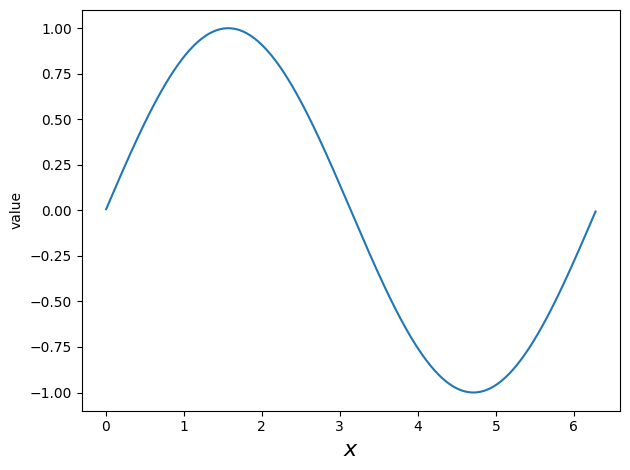

<Figure size 640x480 with 0 Axes>

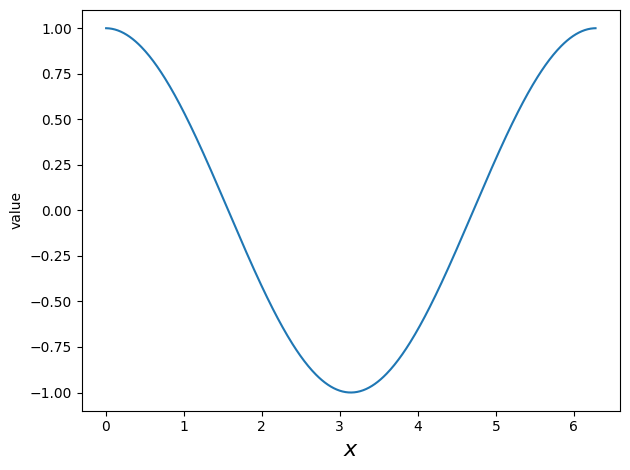

<Figure size 640x480 with 0 Axes>

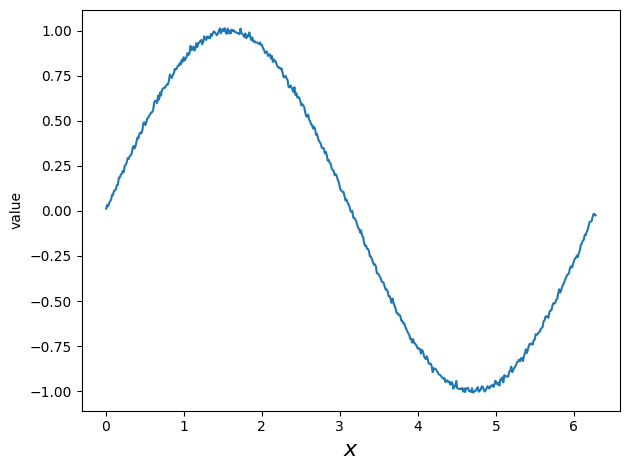

<Figure size 640x480 with 0 Axes>

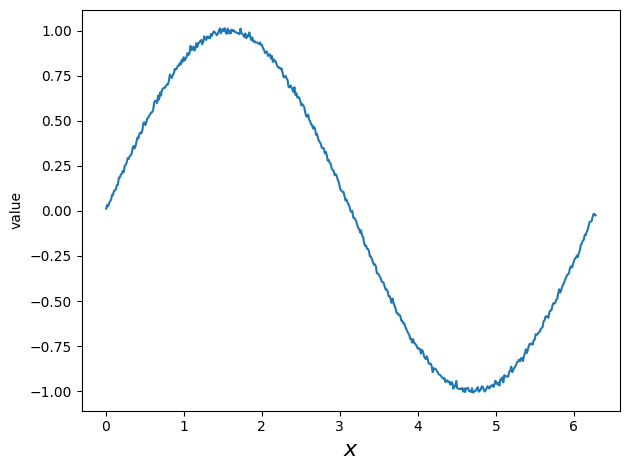

In [11]:
space = odl.uniform_discr(0,2*np.pi,500)

f = space.element(np.sin)
fprime = space.element(np.cos)

f_noisy = f + odl.phantom.noise.white_noise(space, stddev=0.01)

f.show()
fprime.show()
f_noisy.show()


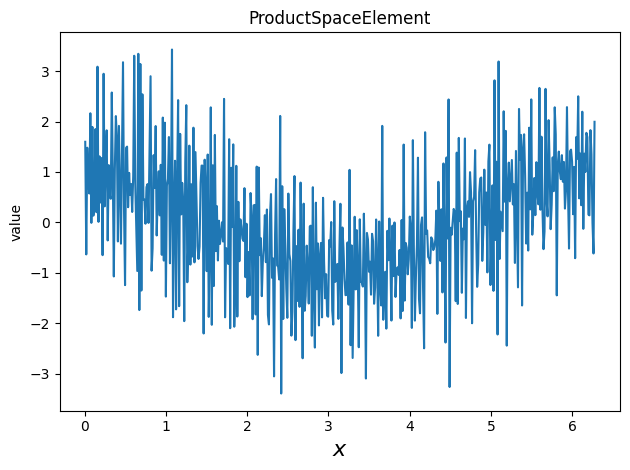

<Figure size 640x480 with 0 Axes>

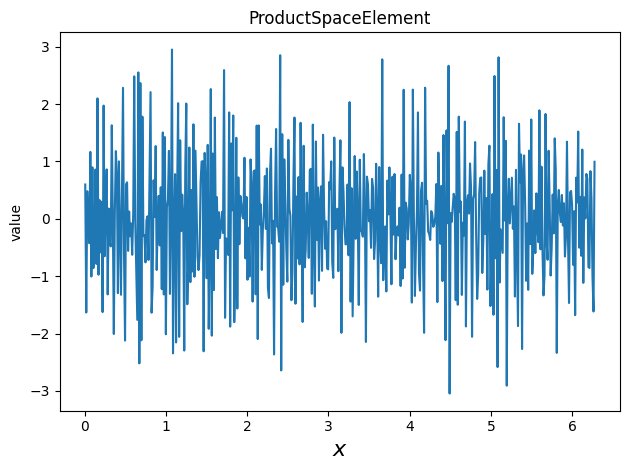

<Figure size 640x480 with 0 Axes>

(<Figure size 640x480 with 1 Axes>,)

In [12]:
gradient_op = odl.discr.diff_ops.Gradient(space)

fp_noisy = gradient_op(f_noisy)

fp_noisy.show()

(fp_noisy - fprime).show()